# Libraries

In [1]:
pip install lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
pip install 'transformers[torch]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.7 MB/s eta 0:00:00


In [3]:
import nltk
from zipfile import ZipFile
import pandas as pd
import os
import glob
import re

In [4]:
file_name = "archive.zip"

# Unzipping files

In [6]:
from posix import listdir
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
os.listdir('/content/BBC News Summary/')

['News Articles', 'Summaries']

In [7]:
sub_folders = os.listdir('/content/BBC News Summary/News Articles')
sub_folders

['tech', 'sport', 'politics', 'entertainment', 'business']

In [8]:
News_Articles_Path = '/content/BBC News Summary/News Articles'

In [9]:
def reading_files(News_Articles_Path, sub_folders):
    articles = []
    categories = []


    for folder in sub_folders:
        article_paths = glob.glob(os.path.join(News_Articles_Path, folder, '*.txt'))
    
        for i in range(len(article_paths)):
          categories.append(folder)

          with open(article_paths[i], mode = 'r', encoding = 'ISO-8859-1') as f:
            articles.append(f.read())
                
    return articles, categories

In [10]:
articles, categories = reading_files(News_Articles_Path, sub_folders)
print(len(articles))
print(len(categories))

2225
2225


In [11]:
import pandas as pd
df = pd.DataFrame({'Category': categories, 'Articles': articles})
df

,Category,Articles
0,tech,Digital guru floats sub-$100 PC\n\nNicholas Ne...
1,tech,Games maker fights for survival\n\nOne of Brit...
2,tech,PC ownership to 'double by 2010'\n\nThe number...
3,tech,Britons fed up with net service\n\nA survey co...
4,tech,Half-Life 2 sweeps Bafta awards\n\nPC first pe...
...,...,...
2220,business,China bans new tobacco factories\n\nThe world'...
2221,business,UK house prices dip in November\n\nUK house pr...
2222,business,JP Morgan admits US slavery links\n\nThousands...
2223,business,India and Iran in gas export deal\n\nIndia has...


# **DATA CLEANING**

# Convert to Lower case

In [12]:
df['Lower'] = df['Articles'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head(5)

,Category,Articles,Lower
0,tech,Digital guru floats sub-$100 PC\n\nNicholas Ne...,digital guru floats sub-$100 pc nicholas negro...
1,tech,Games maker fights for survival\n\nOne of Brit...,games maker fights for survival one of britain...
2,tech,PC ownership to 'double by 2010'\n\nThe number...,pc ownership to 'double by 2010' the number of...
3,tech,Britons fed up with net service\n\nA survey co...,britons fed up with net service a survey condu...
4,tech,Half-Life 2 sweeps Bafta awards\n\nPC first pe...,half-life 2 sweeps bafta awards pc first perso...


# Removing punctuations

In [13]:
df['Punctuations_removal'] = df['Lower'].str.replace('[^\w\s]','', regex = True)
df.head(5)

,Category,Articles,Lower,Punctuations_removal
0,tech,Digital guru floats sub-$100 PC\n\nNicholas Ne...,digital guru floats sub-$100 pc nicholas negro...,digital guru floats sub100 pc nicholas negropo...
1,tech,Games maker fights for survival\n\nOne of Brit...,games maker fights for survival one of britain...,games maker fights for survival one of britain...
2,tech,PC ownership to 'double by 2010'\n\nThe number...,pc ownership to 'double by 2010' the number of...,pc ownership to double by 2010 the number of p...
3,tech,Britons fed up with net service\n\nA survey co...,britons fed up with net service a survey condu...,britons fed up with net service a survey condu...
4,tech,Half-Life 2 sweeps Bafta awards\n\nPC first pe...,half-life 2 sweeps bafta awards pc first perso...,halflife 2 sweeps bafta awards pc first person...


# Removing Special characters

In [14]:
df['Special_Characters_removal'] = df['Punctuations_removal'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
df.head(5)

,Category,Articles,Lower,Punctuations_removal,Special_Characters_removal
0,tech,Digital guru floats sub-$100 PC\n\nNicholas Ne...,digital guru floats sub-$100 pc nicholas negro...,digital guru floats sub100 pc nicholas negropo...,digital guru floats sub100 pc nicholas negropo...
1,tech,Games maker fights for survival\n\nOne of Brit...,games maker fights for survival one of britain...,games maker fights for survival one of britain...,games maker fights for survival one of britain...
2,tech,PC ownership to 'double by 2010'\n\nThe number...,pc ownership to 'double by 2010' the number of...,pc ownership to double by 2010 the number of p...,pc ownership to double by 2010 the number of p...
3,tech,Britons fed up with net service\n\nA survey co...,britons fed up with net service a survey condu...,britons fed up with net service a survey condu...,britons fed up with net service a survey condu...
4,tech,Half-Life 2 sweeps Bafta awards\n\nPC first pe...,half-life 2 sweeps bafta awards pc first perso...,halflife 2 sweeps bafta awards pc first person...,halflife 2 sweeps bafta awards pc first person...


In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Removing Stopwords

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Stopwords_removal'] = df['Special_Characters_removal'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(5)

,Category,Articles,Lower,Punctuations_removal,Special_Characters_removal,Stopwords_removal
0,tech,Digital guru floats sub-$100 PC\n\nNicholas Ne...,digital guru floats sub-$100 pc nicholas negro...,digital guru floats sub100 pc nicholas negropo...,digital guru floats sub100 pc nicholas negropo...,digital guru floats sub100 pc nicholas negropo...
1,tech,Games maker fights for survival\n\nOne of Brit...,games maker fights for survival one of britain...,games maker fights for survival one of britain...,games maker fights for survival one of britain...,games maker fights survival one britains large...
2,tech,PC ownership to 'double by 2010'\n\nThe number...,pc ownership to 'double by 2010' the number of...,pc ownership to double by 2010 the number of p...,pc ownership to double by 2010 the number of p...,pc ownership double 2010 number personal compu...
3,tech,Britons fed up with net service\n\nA survey co...,britons fed up with net service a survey condu...,britons fed up with net service a survey condu...,britons fed up with net service a survey condu...,britons fed net service survey conducted pc pr...
4,tech,Half-Life 2 sweeps Bafta awards\n\nPC first pe...,half-life 2 sweeps bafta awards pc first perso...,halflife 2 sweeps bafta awards pc first person...,halflife 2 sweeps bafta awards pc first person...,halflife 2 sweeps bafta awards pc first person...


In [17]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Tokenization

In [18]:
from textblob import TextBlob

df['Tokenization'] = df['Stopwords_removal'].apply(lambda x: TextBlob(x).words)

# Stemming

In [19]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Stemming'] = df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Lemmatization

In [21]:
from textblob import Word

df['Lemmatization'] = df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [22]:
with pd.option_context('display.max_colwidth', None):
  display(df['Lemmatization'].head(1))

0    digit guru float sub100 pc nichola negropont chairman founder mit medium lab say develop laptop pc go sale le 100 53 told bbc world servic programm go digit hope would becom educ tool develop countri said one laptop per child could import develop child whole famili villag neighbourhood said child could use laptop like text book describ devic strip laptop would run linuxbas oper system get display 20 need rear project imag rather use ordinari flat panel second trick get rid fat skinni gain speed abil use smaller processor slower memori devic probabl export kit part assembl local keep cost mr negropont said profit ventur though recognis manufactur compon would make money 1995 mr negropont publish bestsel digit wide seen predict digit age concept base experi u state main child given laptop comput take home work idea popular amongst child initi receiv resist teacher problem laptop get broken howev mr negropont adapt idea work cambodia set two school togeth wife gave child laptop put 2

# Summary Data Cleaning

In [23]:
Summaries_Path = '/content/BBC News Summary/Summaries'

In [24]:
sub_folders = os.listdir('/content/BBC News Summary/Summaries')
sub_folders

['tech', 'sport', 'politics', 'entertainment', 'business']

In [25]:
def reading_summary_files(Summaries_Path, sub_folders):
    summaries = []
    cat = []


    for folder in sub_folders:
        summary_paths = glob.glob(os.path.join(Summaries_Path, folder, '*.txt'))
    
        for i in range(len(summary_paths)):
          cat.append(folder)

          with open(summary_paths[i], mode = 'r', encoding = 'ISO-8859-1') as f:
            summaries.append(f.read())
                
    return summaries, cat

In [26]:
summaries, cat = reading_summary_files(Summaries_Path, sub_folders)
print(len(summaries))
print(len(cat))

2225
2225


In [27]:
import pandas as pd
df_summary = pd.DataFrame({'Category': cat, 'Summary': summaries})
df_summary

,Category,Summary
0,tech,"He said one laptop per child could be "" very i..."
1,tech,The administrators told BBC News Online that s...
2,tech,More than a third of all new PCs will be in th...
3,tech,"Every month the prices drop, and more and more..."
4,tech,The originality award was won by PlayStation 2...
...,...,...
2220,business,"""China won't allow any new tobacco factories t..."
2221,business,All areas saw a rise in annual house price inf...
2222,business,Thousands of slaves were accepted as collatera...
2223,business,Iran - Opec's second-biggest oil producer and ...


In [28]:
df['Summary']=df_summary['Summary']

In [29]:
df['Summary'][0]

'He said one laptop per child could be " very important to the development of not just that child but now the whole family, village and neighbourhood".He said the child could use the laptop like a text book.Mr Negroponte wants the laptops to become more common than mobile phones but conceded this was ambitious.That\'s for five or six years, so if we can distribute and sell laptops in quantities of one million or more to ministries of education that\'s cheaper and the marketing overheads go away."Nicholas Negroponte, chairman and founder of MIT\'s Media Labs, says he is developing a laptop PC that will go on sale for less than $100 (Â£53).The concept is based on experiments in the US state of Maine, where children were given laptop computers to take home and do their work on.However, Mr Negroponte has adapted the idea to his own work in Cambodia where he set up two schools together with his wife and gave the children laptops."Nokia make 200 million cell phones a year, so for us to claim

# **MODEL**

# Libraries

In [30]:
import json
import pandas as pd
import numpy as np
from pathlib import Path

import torch
from torch import nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
import torchtext
import lightning.pytorch as pl
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split
from termcolor import colored
import textwrap

from transformers import(
    AdamW,
    T5ForConditionalGeneration,
    T5TokenizerFast as T5Tokenizer
)
from tqdm.auto import tqdm

In [31]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid',palette='muted',font_scale=1.2)
rcParams['figure.figsize']=16,10

In [32]:
df=df[['Articles','Summary']]

In [33]:
df


,Articles,Summary
0,Digital guru floats sub-$100 PC\n\nNicholas Ne...,"He said one laptop per child could be "" very i..."
1,Games maker fights for survival\n\nOne of Brit...,The administrators told BBC News Online that s...
2,PC ownership to 'double by 2010'\n\nThe number...,More than a third of all new PCs will be in th...
3,Britons fed up with net service\n\nA survey co...,"Every month the prices drop, and more and more..."
4,Half-Life 2 sweeps Bafta awards\n\nPC first pe...,The originality award was won by PlayStation 2...
...,...,...
2220,China bans new tobacco factories\n\nThe world'...,"""China won't allow any new tobacco factories t..."
2221,UK house prices dip in November\n\nUK house pr...,All areas saw a rise in annual house price inf...
2222,JP Morgan admits US slavery links\n\nThousands...,Thousands of slaves were accepted as collatera...
2223,India and Iran in gas export deal\n\nIndia has...,Iran - Opec's second-biggest oil producer and ...


# Removing Ascii Characters and null values from Articles and Summary

In [34]:
df['Articles']=df['Articles'].str.encode('ascii','ignore').str.decode('ascii')
df['Summary']=df['Summary'].str.encode('ascii','ignore').str.decode('ascii')

<ipython-input-34-04adc5770589>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Articles']=df['Articles'].str.encode('ascii','ignore').str.decode('ascii')
<ipython-input-34-04adc5770589>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Summary']=df['Summary'].str.encode('ascii','ignore').str.decode('ascii')


In [35]:
df=df.dropna()

# Split Training and Test Data sets

In [36]:
train_df,test_df=train_test_split(df,test_size=0.1)

# Dataset Creation using PyTorch

In [37]:
class NewsSummaryDataset(Dataset):
  def __init__(
      self,
      data: pd.DataFrame,
      tokenizer: T5Tokenizer,
      text_max_token_len: int=512,
      summary_max_token_len: int=128
  ):
    self.tokenizer=tokenizer
    self.data=data
    self.text_max_token_len=text_max_token_len
    self.summary_max_token_len=summary_max_token_len

  def __len__(self):
    return len(self.data)

  def __getitem__(self,index:int):
    data_row=self.data.iloc[index]
    text=data_row['Articles']

    text_encoding=tokenizer(
        text,
        max_length=self.text_max_token_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors='pt'
    )
    summary_encoding = tokenizer(
        data_row['Summary'],
        max_length=self.summary_max_token_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors='pt'
    )

    labels = summary_encoding['input_ids']
    labels[labels==0] = -100

    return dict(
        text=text,
        summary=data_row['Summary'],
        text_input_ids=text_encoding['input_ids'].flatten(),
        text_attention_mask=text_encoding['attention_mask'].flatten(),
        labels=labels.flatten(),
        labels_attention_mask=summary_encoding['attention_mask'].flatten()
    )

In [38]:
test_df

,Articles,Summary
1856,Business confidence dips in Japan\n\nBusiness ...,Business confidence among Japanese manufacture...
899,Spain coach faces racism inquiry\n\nSpain's Fo...,Spain's Football Federation has initiated disc...
755,Souness eyes summer move for Owen\n\nNewcastle...,Souness has also hinted he thinks Shearer may ...
139,Security warning over 'FBI virus'\n\nThe US Fe...,An attachment in the e-mail contains the virus...
1219,Voters 'don't trust politicians'\n\nEight out ...,"But according to the BBC poll, 61% said the is..."
...,...,...
847,Cudicini misses Carling Cup final\n\nChelsea g...,But Mourinho has used Cudicini regularly in th...
1149,Blair says UK tsunami aid to soar\n\nTony Blai...,Asked whether he had not returned to work imme...
2129,WMC profits up amid bid criticism\n\nAustralia...,Trade Minister Mark Vaile has said that the bi...
1789,S Korea spending boost to economy\n\nSouth Kor...,"""The focus will be on job creation and economi..."


# Data Module Creation

In [39]:
class NewsSummaryDataModule(pl.LightningDataModule):
  def __init__(
      self,
      train_df: pd.DataFrame,
      test_df: pd.DataFrame,
      tokenizer: T5Tokenizer,
      batch_size: int = 8,
      text_max_token_len: int =512,
      summary_max_token_len: int =128
  ):
    super().__init__()

    self.train_df=train_df
    self.test_df=test_df
    self.batch_size=batch_size
    self.tokenizer=tokenizer
    self.text_max_token_len=text_max_token_len
    self.summary_max_token_len=summary_max_token_len

  def setup(self,stage=None):
    self.train_dataset = NewsSummaryDataset(
        self.train_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len
    )
    self.test_dataset = NewsSummaryDataset(
        self.test_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len
    )

  def train_dataloader(self):
    return DataLoader(
        self.train_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=2
    )

  def test_dataloader(self):
    return DataLoader(
        self.test_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=2
    )

  def val_dataloader(self):
    return DataLoader(
        self.test_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=2
    )

In [40]:
MODEL_NAME='t5-base'
tokenizer=T5Tokenizer.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [41]:
text_token_counts, summary_token_counts=[],[]

for _, row in train_df.iterrows():
  text_token_count=len(tokenizer.encode(row['Articles']))
  text_token_counts.append(text_token_count)

  summary_token_count=len(tokenizer.encode(row['Summary']))
  summary_token_counts.append(summary_token_count)

Token indices sequence length is longer than the specified maximum sequence length for this model (812 > 512). Running this sequence through the model will result in indexing errors


<Axes: ylabel='Count'>

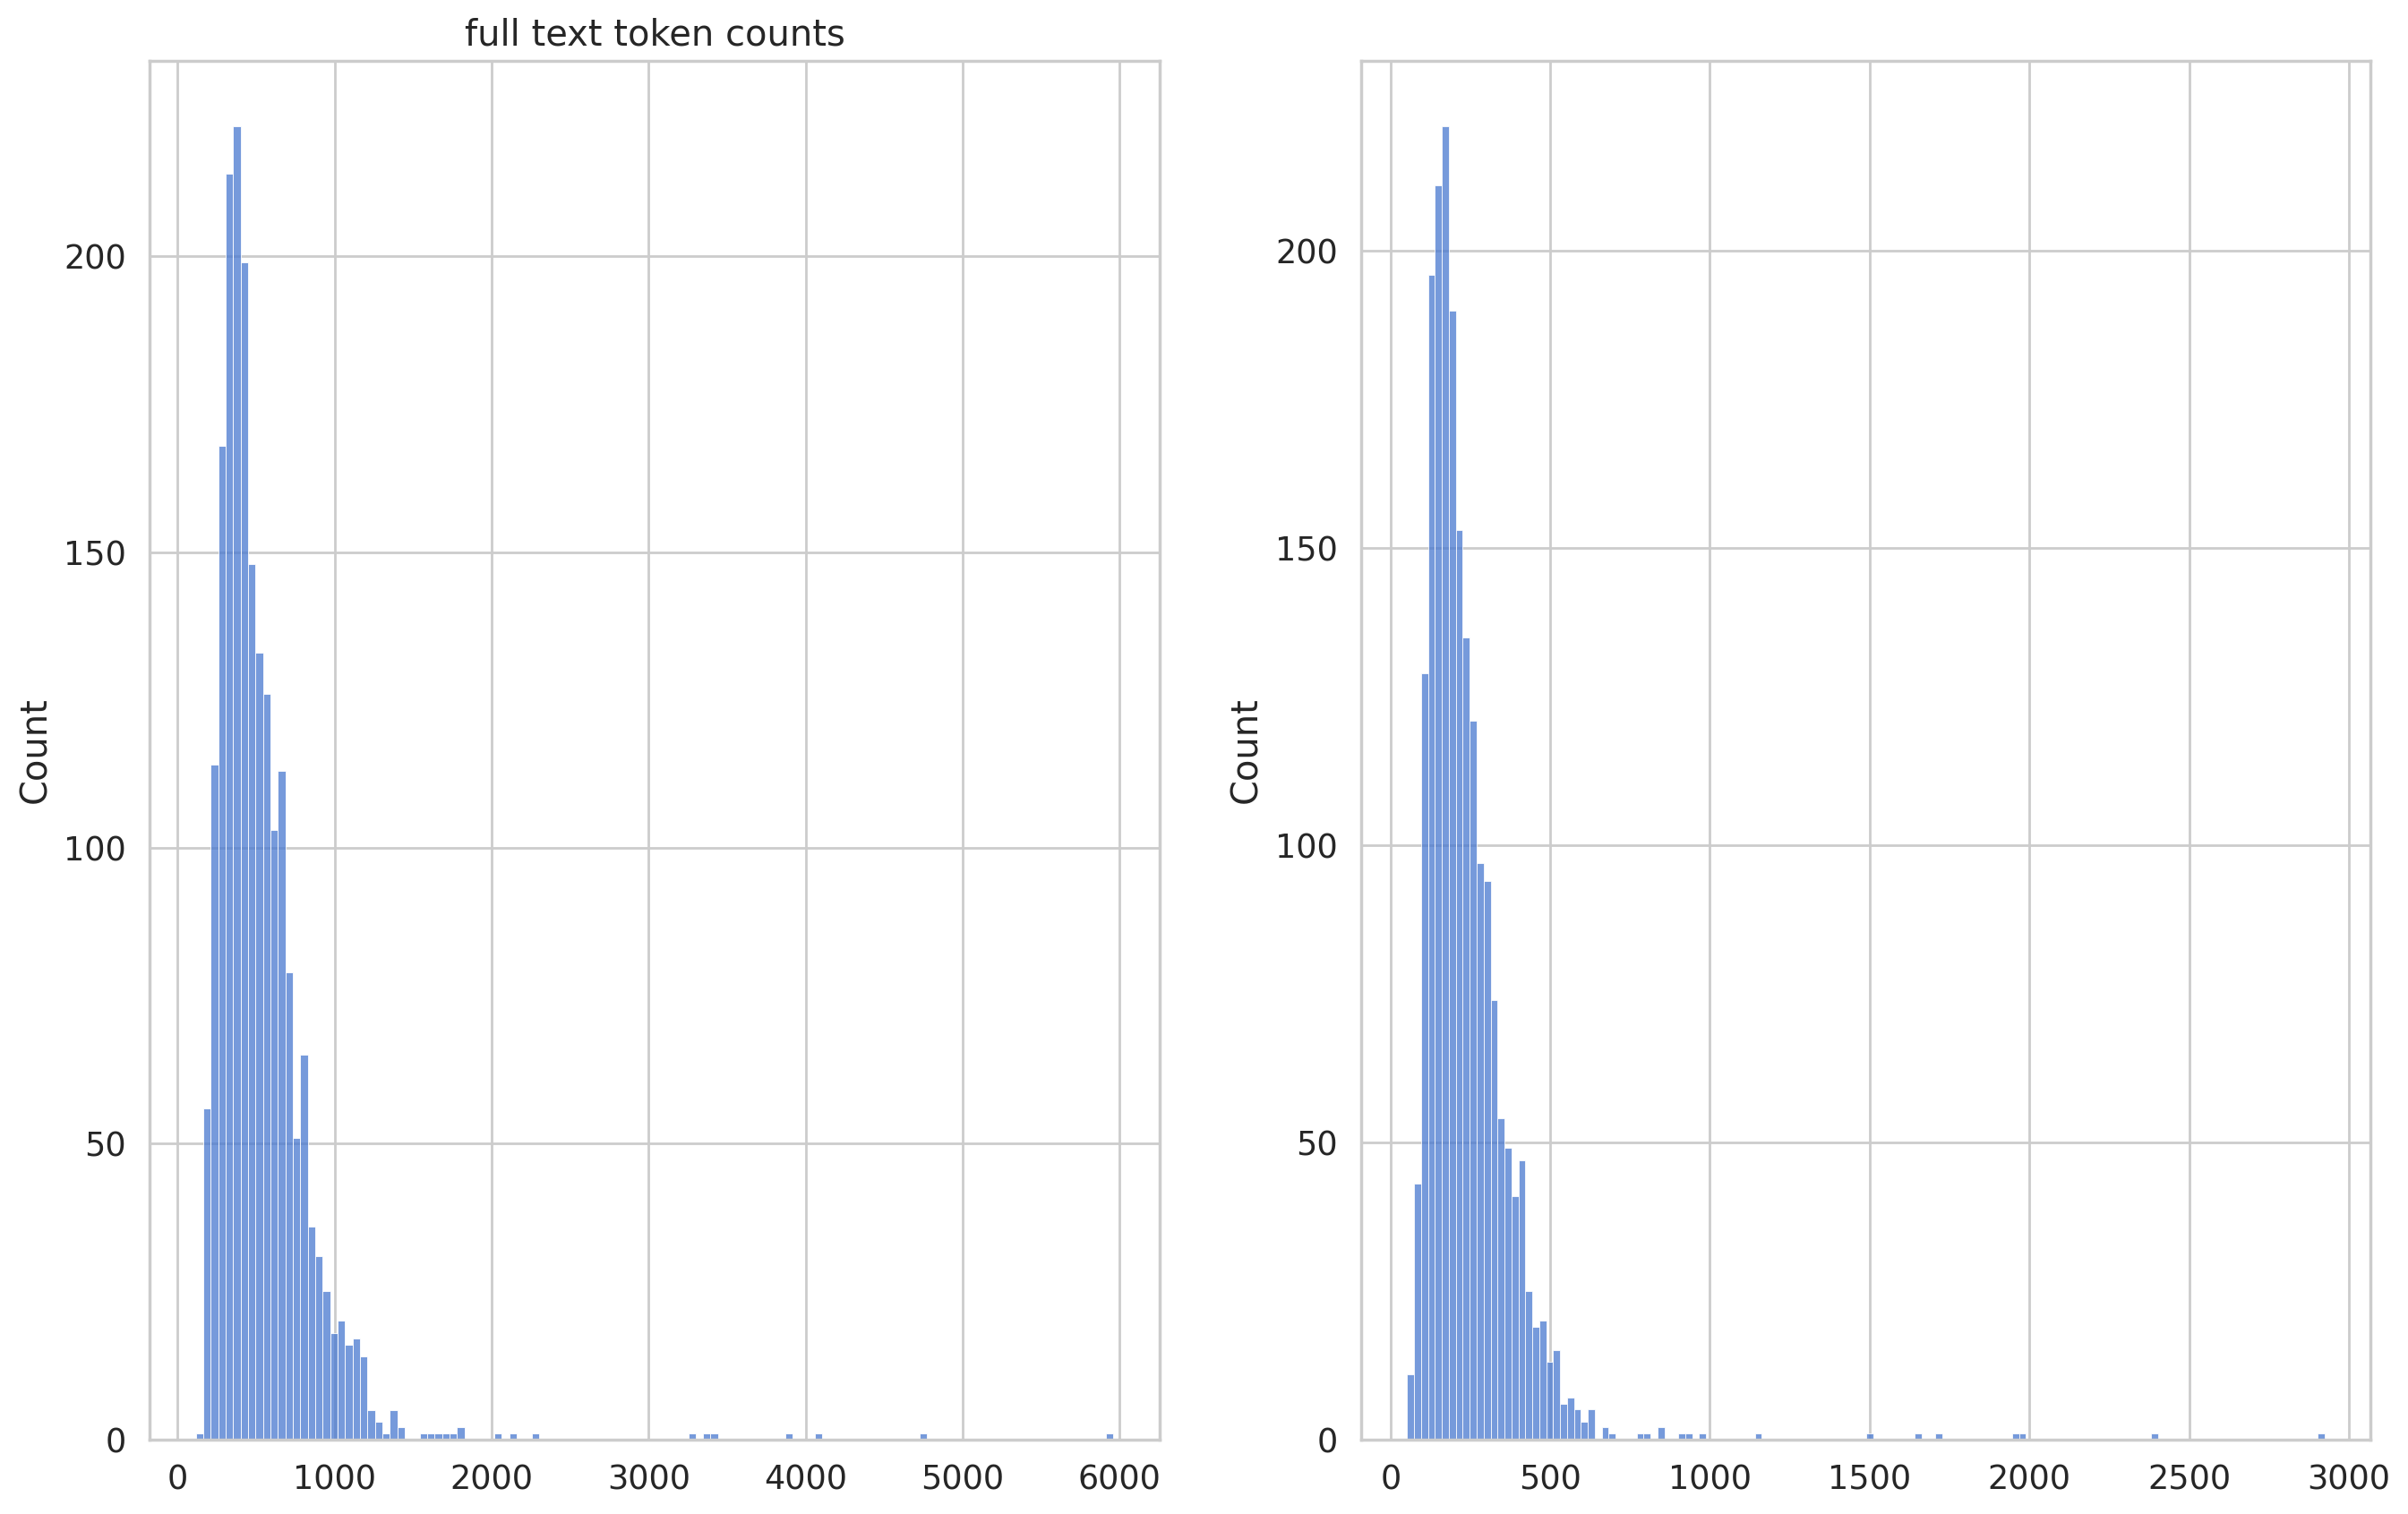

In [42]:
fig,(ax1,ax2)=plt.subplots(1,2)
sns.histplot(text_token_counts,ax=ax1)
ax1.set_title('full text token counts')
sns.histplot(summary_token_counts, ax=ax2)

In [43]:
N_EPOCHS=3
BATCH_SIZE=8
data_module=NewsSummaryDataModule(train_df,test_df,tokenizer)

In [44]:
data_module

# Model Creation

In [45]:
class NewsSummaryModel(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.model=T5ForConditionalGeneration.from_pretrained(MODEL_NAME, return_dict=True)

  def forward(self,input_ids, attention_mask, decoder_attention_mask, labels=None):
    output= self.model(
        input_ids,
        attention_mask=attention_mask,
        labels=labels,
        decoder_attention_mask=decoder_attention_mask
    )

    return output.loss, output.logits

  def training_step(self,batch,batch_size):
    input_ids=batch['text_input_ids']
    attention_mask=batch['text_attention_mask']
    labels=batch['labels']
    labels_attention_mask=batch['labels_attention_mask']

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        labels=labels,
        decoder_attention_mask=labels_attention_mask
    )
    self.log("train_loss", loss, prog_bar=True, logger=True)
    return loss

  def validation_step(self,batch,batch_size):
    input_ids=batch['text_input_ids']
    attention_mask=batch['text_attention_mask']
    labels=batch['labels']
    labels_attention_mask=batch['labels_attention_mask']

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        labels=labels,
        decoder_attention_mask=labels_attention_mask
    )
    self.log("val_loss", loss, prog_bar=True, logger=True)
    return loss

  def test_step(self,batch,batch_size):
    input_ids=batch['text_input_ids']
    attention_mask=batch['text_attention_mask']
    labels=batch['labels']
    labels_attention_mask=batch['labels_attention_mask']

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        labels=labels,
        decoder_attention_mask=labels_attention_mask
    )
    self.log("test_loss", loss, prog_bar=True, logger=True)
    return loss

  def configure_optimizers(self):
    return AdamW(self.parameters(), lr=0.0001)

In [46]:
model= NewsSummaryModel()

# Load Tensor Board

In [47]:
%load_ext tensorboard
%tensorboard --logdir ./lightning_logs

<IPython.core.display.Javascript object>

# Model Fit 

In [48]:
checkpoint_callback = ModelCheckpoint(
    dirpath='checkpoints',
    filename='best-checkpoint',
    save_top_k=1,
    verbose=True,
    monitor='val_loss',
    mode='min'
)

logger=TensorBoardLogger("lightning_logs",name='news-summary')

trainer=pl.Trainer(
    logger=logger,
    callbacks=[checkpoint_callback],
    max_epochs=N_EPOCHS
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [49]:
torch.cuda.empty_cache()

In [50]:
import gc
gc.collect()

239

In [51]:
trainer.fit(model,data_module)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO: 
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
---------------------

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:478: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO: Epoch 0, global step 251: 'val_loss' reached 0.42780 (best 0.42780), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 251: 'val_loss' reached 0.42780 (best 0.42780), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO: Epoch 1, global step 502: 'val_loss' reached 0.39912 (best 0.39912), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 502: 'val_loss' reached 0.39912 (best 0.39912), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

INFO: Epoch 2, global step 753: 'val_loss' reached 0.38863 (best 0.38863), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 753: 'val_loss' reached 0.38863 (best 0.38863), saving model to '/content/checkpoints/best-checkpoint.ckpt' as top 1
INFO: `Trainer.fit` stopped: `max_epochs=3` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [52]:
trained_model=NewsSummaryModel.load_from_checkpoint(
    trainer.checkpoint_callback.best_model_path
)
trained_model.freeze()
trained_model.to('cpu')

NewsSummaryModel(
  (model): T5ForConditionalGeneration(
    (shared): Embedding(32128, 768)
    (encoder): T5Stack(
      (embed_tokens): Embedding(32128, 768)
      (block): ModuleList(
        (0): T5Block(
          (layer): ModuleList(
            (0): T5LayerSelfAttention(
              (SelfAttention): T5Attention(
                (q): Linear(in_features=768, out_features=768, bias=False)
                (k): Linear(in_features=768, out_features=768, bias=False)
                (v): Linear(in_features=768, out_features=768, bias=False)
                (o): Linear(in_features=768, out_features=768, bias=False)
                (relative_attention_bias): Embedding(32, 12)
              )
              (layer_norm): T5LayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (1): T5LayerFF(
              (DenseReluDense): T5DenseActDense(
                (wi): Linear(in_features=768, out_features=3072, bias=False)
                (wo): Linear(in_fe

# Summarizer

In [53]:
def summarizeText(text):
  text_encoding=tokenizer(
      text,
      max_length=512,
      padding='max_length',
      truncation=True,
      return_attention_mask=True,
      add_special_tokens=True,
      return_tensors='pt'
  )
  generated_ids= trained_model.model.generate(
      input_ids=text_encoding['input_ids'],
      attention_mask=text_encoding['attention_mask'],
      max_length=150,
      num_beams=2,
      repetition_penalty=2.5,
      length_penalty=1.0,
      early_stopping=True
  )
  preds=[
      tokenizer.decode(gen_id,skip_special_tokens=True,clean_up_tokenization_spaces=True)
      for gen_id in generated_ids
  ]
  return "".join(preds)

In [54]:
sample_row=test_df.iloc[0]
text=sample_row['Articles']
model_summary=summarizeText(text)
text

'Business confidence dips in Japan\n\nBusiness confidence among Japanese manufacturers has weakened for the first time since March 2003, the quarterly Tankan survey has found.\n\nSlower economic growth, rising oil prices, a stronger yen and weaker exports were blamed for the fall. December\'s confidence level was below that seen in September, the Bank of Japan said. However, September\'s reading was the strongest for 13 years. "The economy is at a pause but unlikely to fall", the economy minister said. "It will feel a bit slower (next year) than this year, and growth may be a bit more gentle but the situation is that the recovery will continue," said economy minister Heizo Takenaka. In the Bank of Japan\'s December survey, the balance of big manufacturers saying business conditions are better, minus those saying they are worse, was 22, down from 26 in September.\n\nJapan\'s economy grew by just 0.1% in the three months to September, according revised data issued this month. With the re

In [55]:
sample_row['Summary']

'Business confidence among Japanese manufacturers has weakened for the first time since March 2003, the quarterly Tankan survey has found."The economy is at a pause but unlikely to fall", the economy minister said.In the Bank of Japan\'s December survey, the balance of big manufacturers saying business conditions are better, minus those saying they are worse, was 22, down from 26 in September.Confidence among non-manufacturers was unchanged in the final quarter of 2004, but it is forecast to drop one point in the March survey."It will feel a bit slower (next year) than this year, and growth may be a bit more gentle but the situation is that the recovery will continue," said economy minister Heizo Takenaka.December\'s confidence level was below that seen in September, the Bank of Japan said.Companies reported they expect to invest 7.7% more in the year to March 2005 than the previous year - up from expectations of 6.1% increase in the September Tankan.'

In [56]:
model_summary

'In the Bank of Japan\'s December survey, the balance of big manufacturers saying business conditions are better, minus those saying they are worse, was 22, down from 26 in September.Business confidence among Japanese manufacturers has weakened for the first time since March 2003, the quarterly Tankan survey has found."The economy is at a pause but unlikely to fall", the economy minister said.Japan\'s economy grew by just 0.1% in the three months to September, according revised data issued this month.Confidence among non-manufacturers was unchanged in the final quarter of 2004, but it is forecast'

# **Evaluation Metrics**

# ROGUE Score

In [76]:
pip install Rouge  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
from rouge import Rouge

In [75]:
output=pd.DataFrame(columns=['Model Summary', 'Actual Summary'])
for index, row in test_df.head(10).iterrows():
  print(index)
  text=row['Articles']
  model_summary=summarizeText(text)
  actual_summary=row['Summary']
  output.loc[len(output.index)]=[model_summary, actual_summary]
  print(output)
output

1856
                                       Model Summary  \
0  In the Bank of Japan's December survey, the ba...   

                                      Actual Summary  
0  Business confidence among Japanese manufacture...  
899
                                       Model Summary  \
0  In the Bank of Japan's December survey, the ba...   
1  Spain's Football Federation has initiated disc...   

                                      Actual Summary  
0  Business confidence among Japanese manufacture...  
1  Spain's Football Federation has initiated disc...  
755
                                       Model Summary  \
0  In the Bank of Japan's December survey, the ba...   
1  Spain's Football Federation has initiated disc...   
2  Newcastle boss Graeme Souness is lining up a s...   

                                      Actual Summary  
0  Business confidence among Japanese manufacture...  
1  Spain's Football Federation has initiated disc...  
2  Souness has also hinted he thinks She

,Model Summary,Actual Summary
0,"In the Bank of Japan's December survey, the ba...",Business confidence among Japanese manufacture...
1,Spain's Football Federation has initiated disc...,Spain's Football Federation has initiated disc...
2,Newcastle boss Graeme Souness is lining up a s...,Souness has also hinted he thinks Shearer may ...
3,An attachment in the e-mail contains the virus...,An attachment in the e-mail contains the virus...
4,"But according to the BBC poll, 61% said the is...","But according to the BBC poll, 61% said the is..."
5,Lindsay Davenport has put any talk of retireme...,The 28-year-old world number one had said that...
6,But they have slowly realised that P2P is a go...,But they have slowly realised that P2P is a go...
7,"Heineken and Carlsberg, two of the world's lar...","Heineken and Carlsberg, two of the world's lar..."
8,Theatre impresario Sir Cameron Mackintosh has ...,Mary Poppins was originally created by author ...
9,Immigration and asylum have normally been issu...,Immigration and asylum have normally been issu...


In [79]:
rouge=Rouge()

In [80]:
rouge.get_scores(output['Model Summary'],output['Actual Summary'],avg=True)

{'rouge-1': {'r': 0.6416287939944045,
  'p': 0.9226591740615724,
  'f': 0.7451230703978617},
 'rouge-2': {'r': 0.5553065799201777,
  'p': 0.8811679927270706,
  'f': 0.6674467872579355},
 'rouge-l': {'r': 0.6369896988048506,
  'p': 0.9159574880061223,
  'f': 0.73964502719168}}